In [ ]:
# Objective: Predict Customer Churn
#- Use historical customer data to predict if a customer is likely to churn.
#- Implement strategies to retain at-risk customers.


In [8]:
#Gather and explore data
import pandas as pd

# Load the dataset
data = pd.read_csv('./Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Print column names to diagnose the issue
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [10]:

# Convert 'TotalCharges' to numeric, coerce errors to NaN, and fill with mean
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Drop 'customerID' as it's not useful for the model
data = data.drop(['customerID'], axis=1)

# Identify categorical columns to encode
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Churn')

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check for missing values after cleaning
missing_values_after = data_encoded.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

# Display the first few rows of the cleaned data
data_encoded.head()


Missing values after handling:
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes        

C:\Users\samir\AppData\Local\Temp\ipykernel_14132\3557529670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [14]:
#Exploratory Data Analysis (EDA)
# Print column names to verify 'Churn_Yes' exists
print(data_encoded.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [15]:
# Convert 'Churn' to binary format
data_encoded['Churn'] = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the conversion
print(data_encoded['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


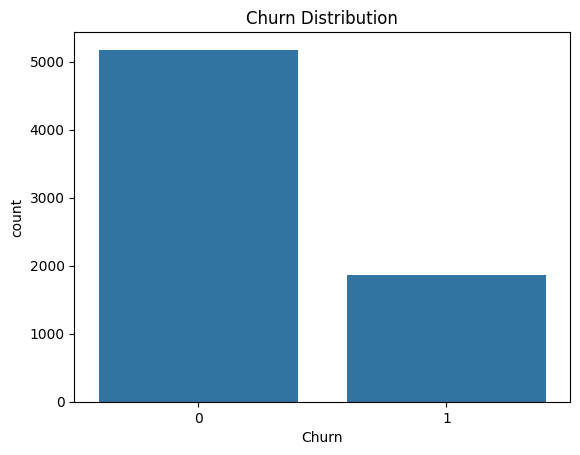

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=data_encoded)
plt.title('Churn Distribution')
plt.show()


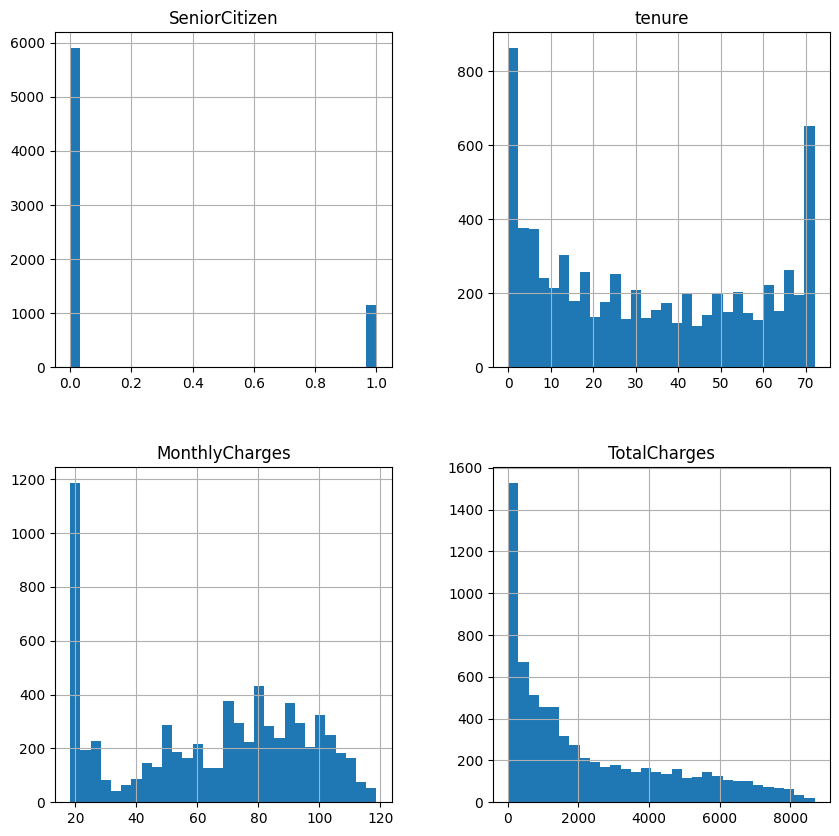

In [17]:
# Distribution of numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
data_encoded[numerical_features].hist(bins=30, figsize=(10, 10))
plt.show()


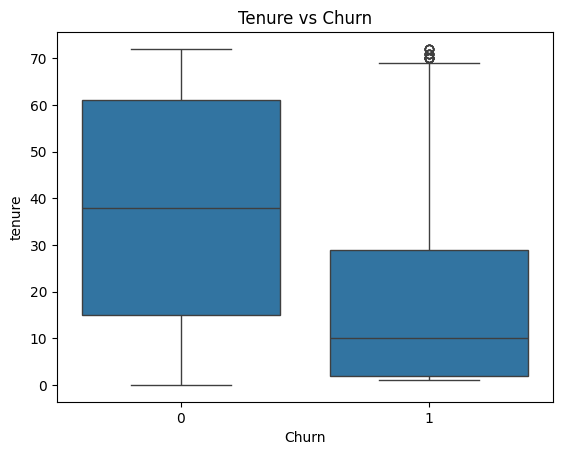

In [18]:
# Relationship between tenure and churn
sns.boxplot(x='Churn', y='tenure', data=data_encoded)
plt.title('Tenure vs Churn')
plt.show()


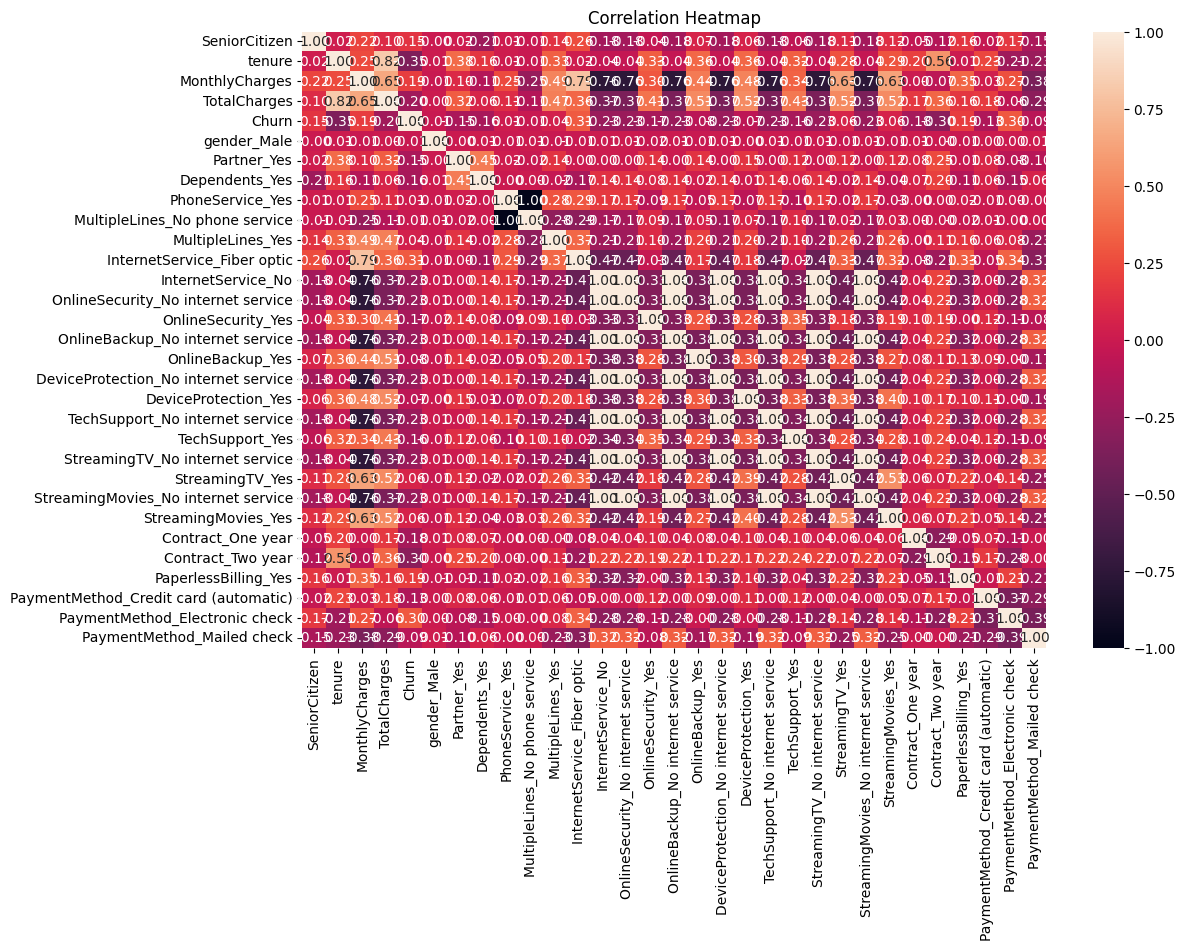

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Machine Learning Model Building

In [22]:
#Split the data
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (4930, 30), (4930,)
Testing set: (2113, 30), (2113,)


In [24]:
#Train a Baseline Model
#1 Scale the Data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model with increased max_iter
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

[[1386  153]
 [ 244  330]]


In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

[[1407  132]
 [ 303  271]]


In [27]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

[[1398  141]
 [ 272  302]]


In [28]:
#Hyperparameter Tuning
#Use Grid Search for hyperparameter tuning.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best parameters to train the final model
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Random Forest Classifier")
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
Best Random Forest Classifier
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1415  124]
 [ 299  275]]


In [29]:
#Interpret Results
#Using SHAP for model interpretability.

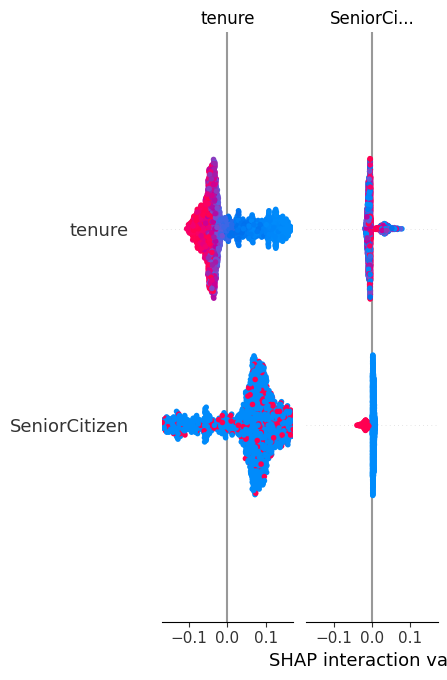

In [32]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Ensure using the correct index for shap_values based on the model's output structure
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # For models with multiple outputs, e.g., binary classification

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [42]:
# Verify shapes
print("Shape of SHAP values:", shap_values.shape)
print("Shape of X_test:", X_test.shape)


Shape of SHAP values: (2113, 30, 2)
Shape of X_test: (2113, 30)


In [47]:
import shap

# Initialize the SHAP explainer using the unscaled training data
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_unscaled)

# Select SHAP values for the positive class (second class)
shap_values = shap_values[1]

# Verify shapes
print("Shape of SHAP values:", shap_values.shape)
print("Shape of X_test_unscaled:", X_test_unscaled.shape)


Shape of SHAP values: (30, 2)
Shape of X_test_unscaled: (2113, 30)


In [ ]:
#other features

In [71]:
!pip install --upgrade scikit-learn


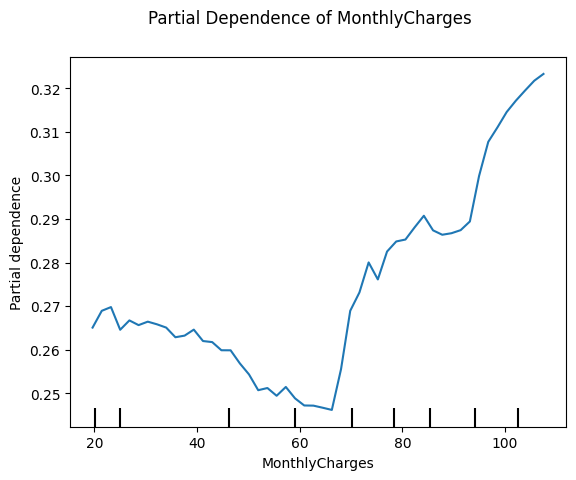

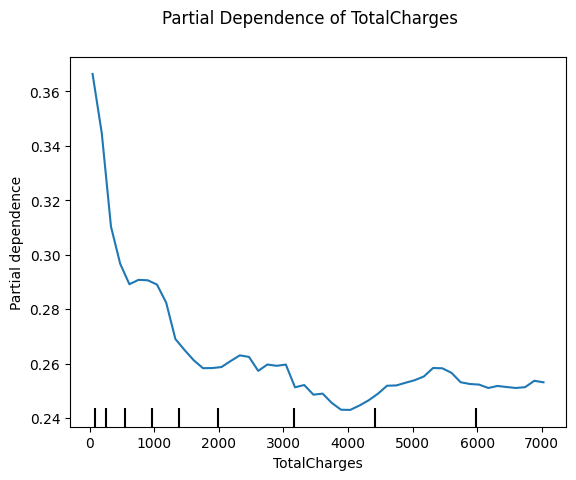

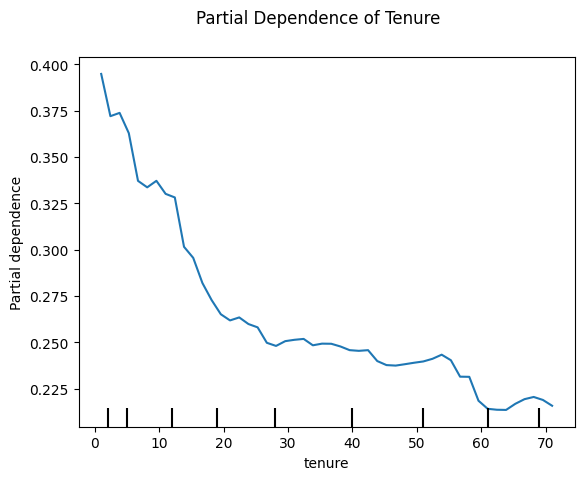

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train the model using the unscaled data
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_model.fit(X_train_unscaled, y_train_unscaled)

# PDP for 'MonthlyCharges'
disp = PartialDependenceDisplay.from_estimator(best_rf_model, X_test_unscaled, ['MonthlyCharges'], grid_resolution=50)
disp.figure_.suptitle('Partial Dependence of MonthlyCharges')
plt.show()

# PDP for 'TotalCharges'
disp = PartialDependenceDisplay.from_estimator(best_rf_model, X_test_unscaled, ['TotalCharges'], grid_resolution=50)
disp.figure_.suptitle('Partial Dependence of TotalCharges')
plt.show()

# PDP for 'tenure'
disp = PartialDependenceDisplay.from_estimator(best_rf_model, X_test_unscaled, ['tenure'], grid_resolution=50)
disp.figure_.suptitle('Partial Dependence of Tenure')
plt.show()


In [73]:
#Predict using the trained model

Accuracy: 0.79
Confusion Matrix:
[[1407  132]
 [ 303  271]]


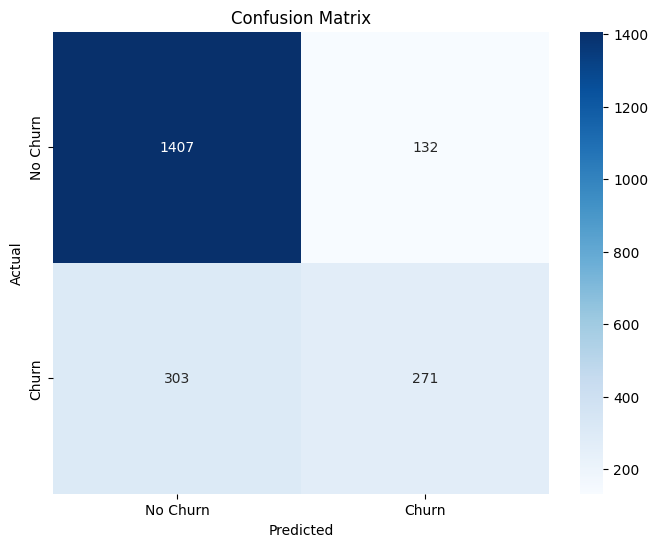

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train the model using the unscaled data
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_unscaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_unscaled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_unscaled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test_unscaled, y_pred)
print("Classification Report:")
print(class_report)


In [ ]:
#showing the ROC curve for the model

AUC Score: 0.84


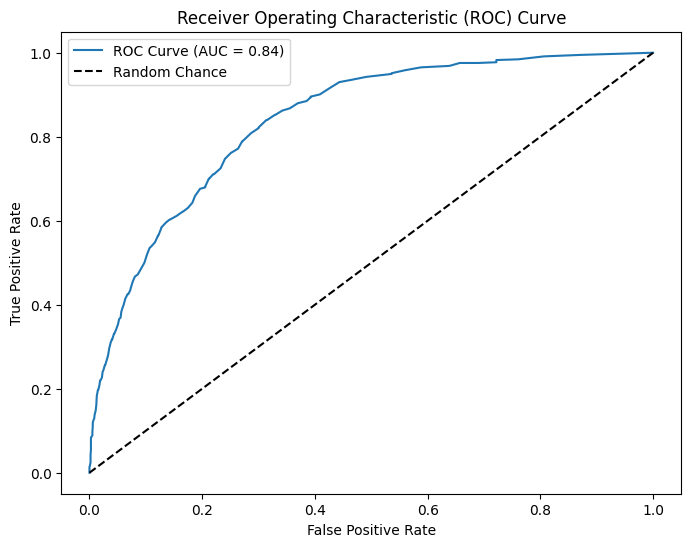

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train the model using the unscaled data
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_unscaled)
y_pred_prob = best_rf_model.predict_proba(X_test_unscaled)[:, 1]  # Get probability predictions for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_unscaled, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test_unscaled, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


In [77]:
#Comparing Multiple Models

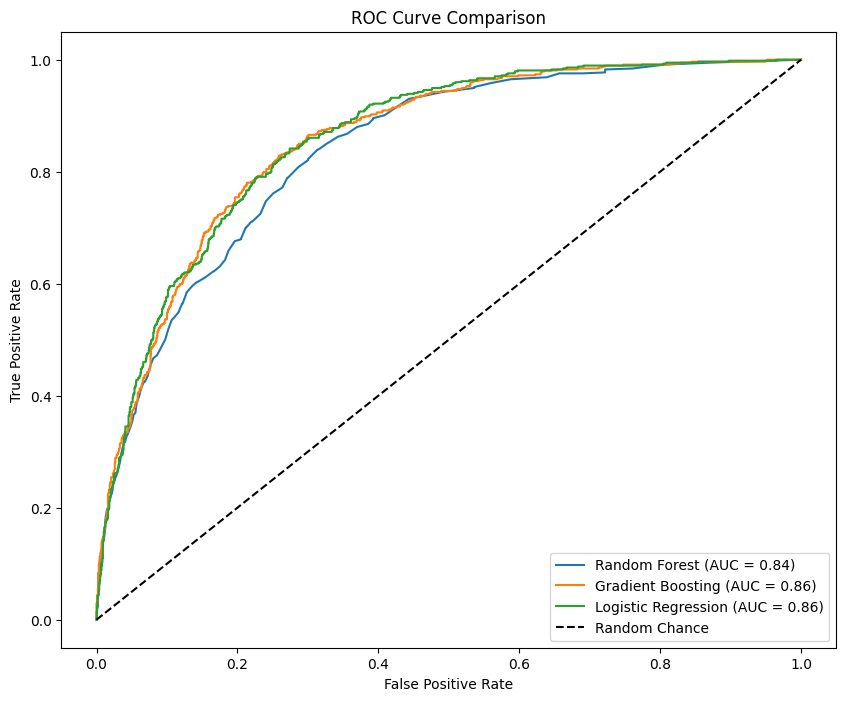

Model: Random Forest
Accuracy: 0.79
Confusion Matrix:
[[1407  132]
 [ 303  271]]
Classification Report:
              precision    recall  f1-score      support
0              0.822807  0.914230  0.866113  1539.000000
1              0.672457  0.472125  0.554759   574.000000
accuracy       0.794132  0.794132  0.794132     0.794132
macro avg      0.747632  0.693178  0.710436  2113.000000
weighted avg   0.781964  0.794132  0.781533  2113.000000


Model: Gradient Boosting
Accuracy: 0.80
Confusion Matrix:
[[1398  141]
 [ 272  302]]
Classification Report:
              precision    recall  f1-score      support
0              0.837126  0.908382  0.871299  1539.000000
1              0.681716  0.526132  0.593904   574.000000
accuracy       0.804543  0.804543  0.804543     0.804543
macro avg      0.759421  0.717257  0.732602  2113.000000
weighted avg   0.794908  0.804543  0.795944  2113.000000


Model: Logistic Regression
Accuracy: 0.81
Confusion Matrix:
[[1388  151]
 [ 247  327]]
Classificatio

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions and calculate metrics
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_unscaled)
    y_pred_prob = model.predict_proba(X_test_unscaled)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_unscaled, y_pred_prob)
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test_unscaled, y_pred_prob)
    
    model_results[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc_score': auc_score,
        'accuracy': accuracy_score(y_test_unscaled, y_pred),
        'confusion_matrix': confusion_matrix(y_test_unscaled, y_pred),
        'classification_report': classification_report(y_test_unscaled, y_pred, output_dict=True)
    }

# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))

for name, result in model_results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["auc_score"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

# Optional: Evaluate the Results
for name, result in model_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")


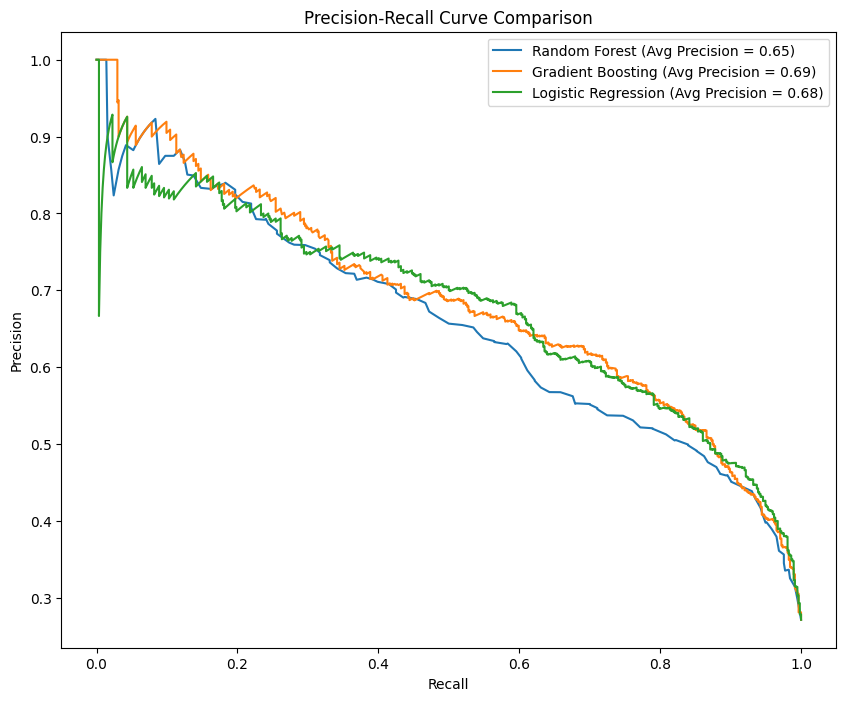

Model: Random Forest
Accuracy: 0.79
Confusion Matrix:
[[1407  132]
 [ 303  271]]
Classification Report:
              precision    recall  f1-score      support
0              0.822807  0.914230  0.866113  1539.000000
1              0.672457  0.472125  0.554759   574.000000
accuracy       0.794132  0.794132  0.794132     0.794132
macro avg      0.747632  0.693178  0.710436  2113.000000
weighted avg   0.781964  0.794132  0.781533  2113.000000


Model: Gradient Boosting
Accuracy: 0.80
Confusion Matrix:
[[1398  141]
 [ 272  302]]
Classification Report:
              precision    recall  f1-score      support
0              0.837126  0.908382  0.871299  1539.000000
1              0.681716  0.526132  0.593904   574.000000
accuracy       0.804543  0.804543  0.804543     0.804543
macro avg      0.759421  0.717257  0.732602  2113.000000
weighted avg   0.794908  0.804543  0.795944  2113.000000


Model: Logistic Regression
Accuracy: 0.81
Confusion Matrix:
[[1388  151]
 [ 247  327]]
Classificatio

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions and calculate metrics
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_unscaled)
    y_pred_prob = model.predict_proba(X_test_unscaled)[:, 1]
    
    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test_unscaled, y_pred_prob)
    
    # Calculate average precision score
    avg_precision = average_precision_score(y_test_unscaled, y_pred_prob)
    
    model_results[name] = {
        'precision': precision,
        'recall': recall,
        'avg_precision': avg_precision,
        'accuracy': accuracy_score(y_test_unscaled, y_pred),
        'confusion_matrix': confusion_matrix(y_test_unscaled, y_pred),
        'classification_report': classification_report(y_test_unscaled, y_pred, output_dict=True)
    }

# Plot Precision-Recall curves for comparison
plt.figure(figsize=(10, 8))

for name, result in model_results.items():
    plt.plot(result['recall'], result['precision'], label=f'{name} (Avg Precision = {result["avg_precision"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.show()

# Optional: Evaluate the Results
for name, result in model_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")


In [80]:
#Calculating F1 Score for Multiple Models

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions and calculate metrics
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_unscaled)
    y_pred_prob = model.predict_proba(X_test_unscaled)[:, 1]
    
    # Calculate precision, recall, and F1 score
    report = classification_report(y_test_unscaled, y_pred, output_dict=True)
    f1 = f1_score(y_test_unscaled, y_pred)
    
    model_results[name] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': f1,
        'accuracy': report['accuracy'],
        'confusion_matrix': confusion_matrix(y_test_unscaled, y_pred),
        'classification_report': report
    }

# Print F1 Scores and Other Metrics
for name, result in model_results.items():
    print(f"Model: {name}")
    print(f"F1 Score: {result['f1_score']:.2f}")
    print(f"Precision: {result['precision']:.2f}")
    print(f"Recall: {result['recall']:.2f}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")


Model: Random Forest
F1 Score: 0.55
Precision: 0.67
Recall: 0.47
Accuracy: 0.79
Confusion Matrix:
[[1407  132]
 [ 303  271]]
Classification Report:
              precision    recall  f1-score      support
0              0.822807  0.914230  0.866113  1539.000000
1              0.672457  0.472125  0.554759   574.000000
accuracy       0.794132  0.794132  0.794132     0.794132
macro avg      0.747632  0.693178  0.710436  2113.000000
weighted avg   0.781964  0.794132  0.781533  2113.000000


Model: Gradient Boosting
F1 Score: 0.59
Precision: 0.68
Recall: 0.53
Accuracy: 0.80
Confusion Matrix:
[[1398  141]
 [ 272  302]]
Classification Report:
              precision    recall  f1-score      support
0              0.837126  0.908382  0.871299  1539.000000
1              0.681716  0.526132  0.593904   574.000000
accuracy       0.804543  0.804543  0.804543     0.804543
macro avg      0.759421  0.717257  0.732602  2113.000000
weighted avg   0.794908  0.804543  0.795944  2113.000000


Model: Logis

In [82]:
#Comparing Accuracy Scores of models

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions and calculate metrics
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_unscaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_unscaled, y_pred)
    
    model_results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test_unscaled, y_pred),
        'classification_report': classification_report(y_test_unscaled, y_pred, output_dict=True)
    }

# Print accuracy scores and other metrics
for name, result in model_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")


Model: Random Forest
Accuracy: 0.79
Confusion Matrix:
[[1407  132]
 [ 303  271]]
Classification Report:
              precision    recall  f1-score      support
0              0.822807  0.914230  0.866113  1539.000000
1              0.672457  0.472125  0.554759   574.000000
accuracy       0.794132  0.794132  0.794132     0.794132
macro avg      0.747632  0.693178  0.710436  2113.000000
weighted avg   0.781964  0.794132  0.781533  2113.000000


Model: Gradient Boosting
Accuracy: 0.80
Confusion Matrix:
[[1398  141]
 [ 272  302]]
Classification Report:
              precision    recall  f1-score      support
0              0.837126  0.908382  0.871299  1539.000000
1              0.681716  0.526132  0.593904   574.000000
accuracy       0.804543  0.804543  0.804543     0.804543
macro avg      0.759421  0.717257  0.732602  2113.000000
weighted avg   0.794908  0.804543  0.795944  2113.000000


Model: Logistic Regression
Accuracy: 0.81
Confusion Matrix:
[[1388  151]
 [ 247  327]]
Classificatio

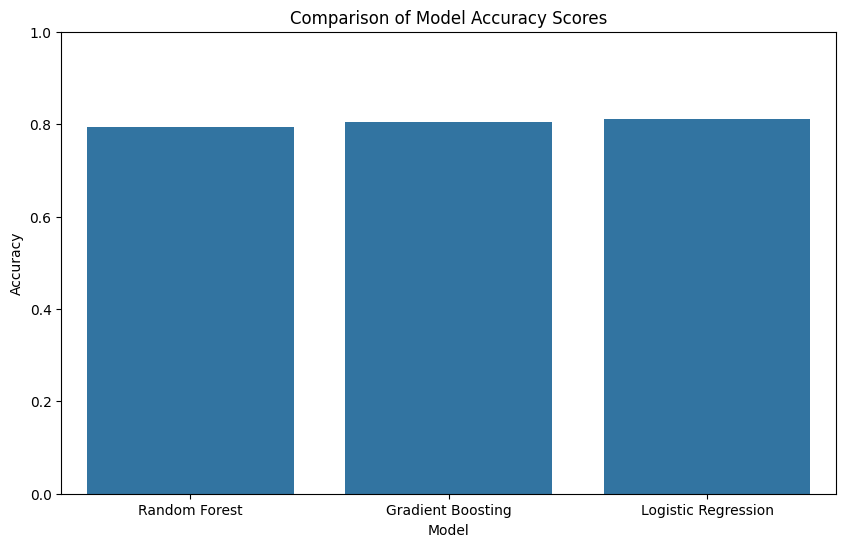

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X_unscaled = data_encoded.drop('Churn', axis=1)
y_unscaled = data_encoded['Churn']

# Split the data into training and testing sets using unscaled data
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=42)

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_unscaled, y_train_unscaled)

# Make predictions and calculate metrics
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_unscaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_unscaled, y_pred)
    
    model_results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test_unscaled, y_pred),
        'classification_report': classification_report(y_test_unscaled, y_pred, output_dict=True)
    }

# Extract accuracy scores for visualization
accuracy_scores = {name: result['accuracy'] for name, result in model_results.items()}

# Create a DataFrame for easy plotting
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_df.index,y='Accuracy', data=accuracy_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 1) # Assuming accuracy ranges from 0 to 1
plt.show()


In [87]:
#Churn prediction model using Logistic Regression

Accuracy: 0.81
Confusion Matrix:
[[1388  151]
 [ 247  327]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

ROC AUC Score: 0.86
Average Precision-Recall Score: 0.68


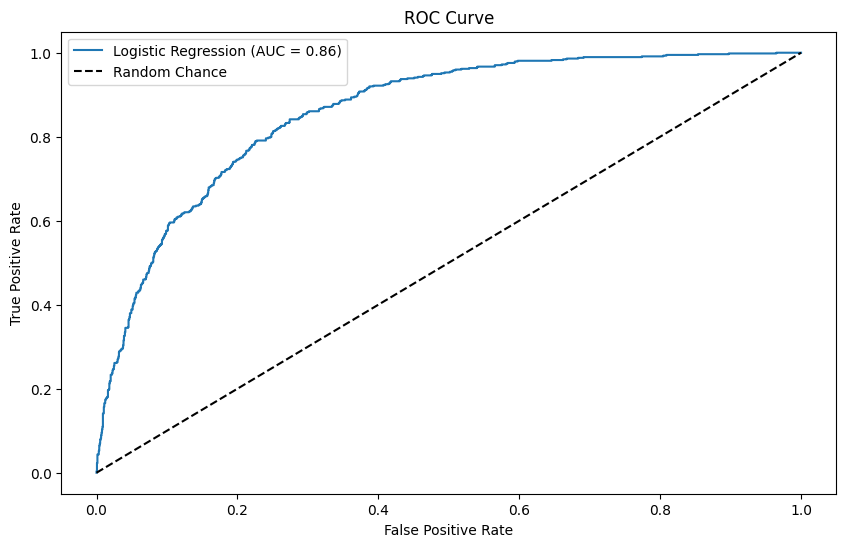

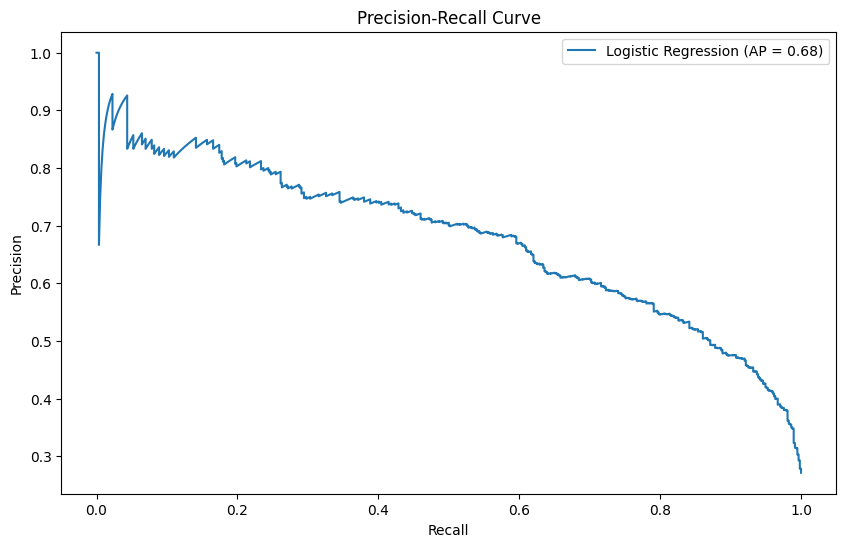

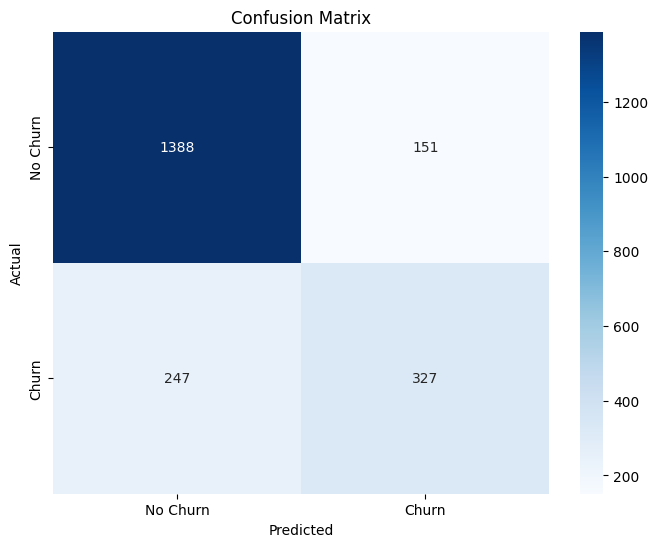

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)
print(f"Average Precision-Recall Score: {avg_precision:.2f}")

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [89]:
#compare logistic Regression to decision tree

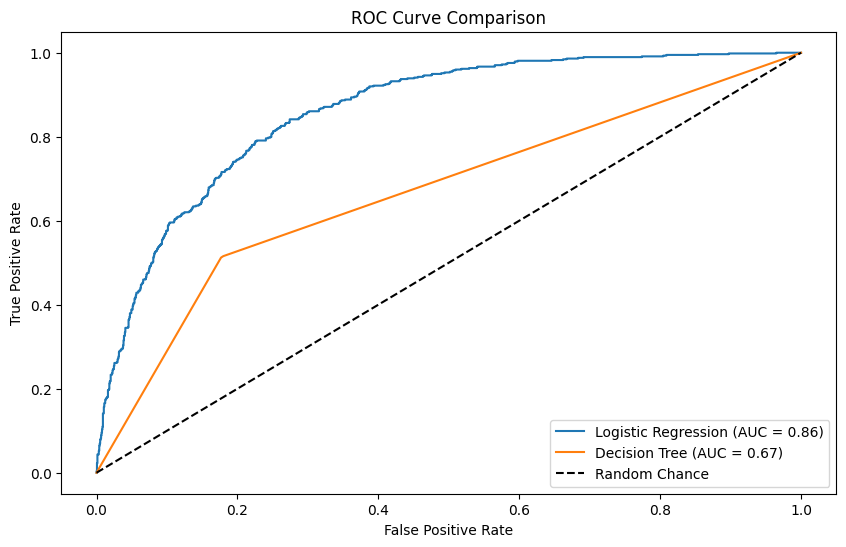

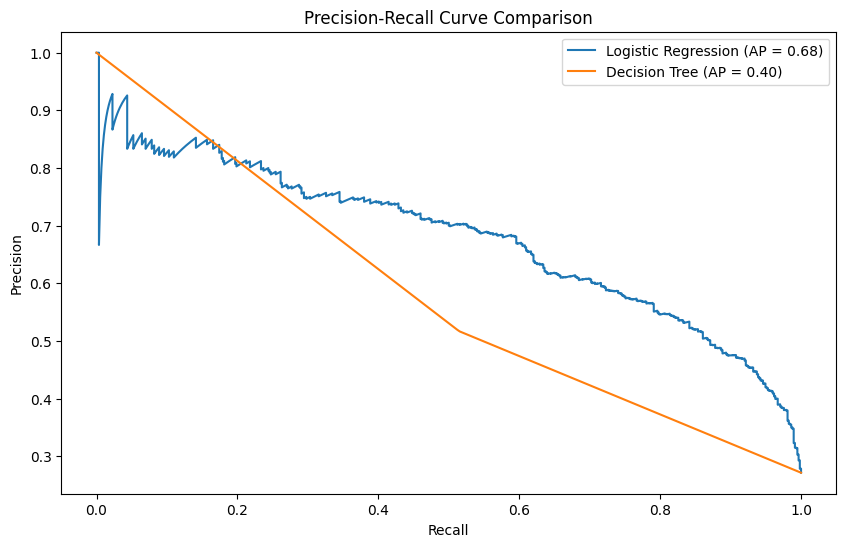

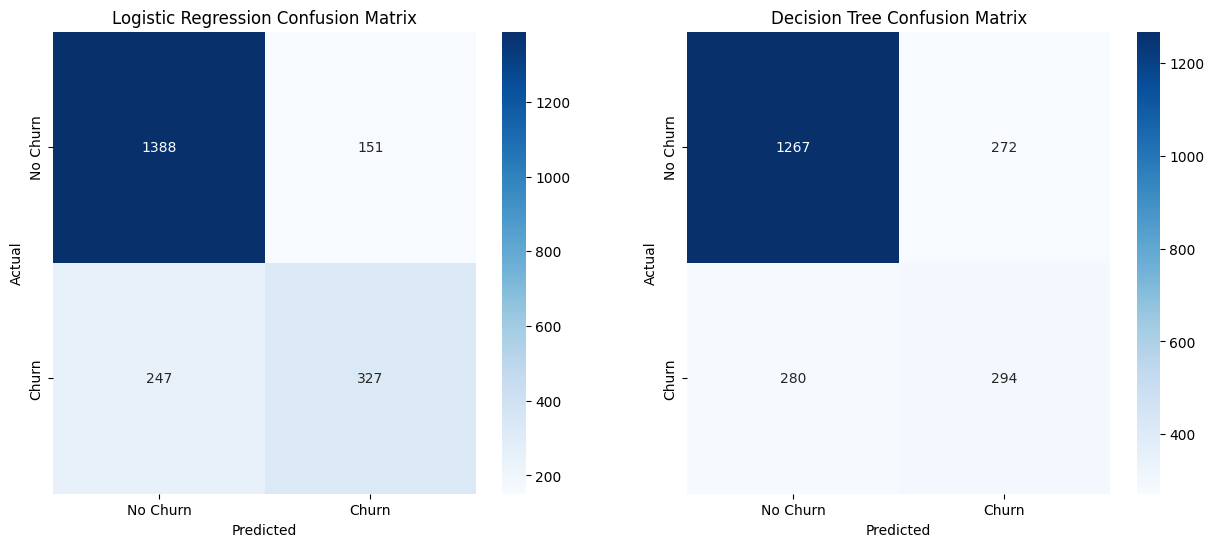

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1539
           1       0.52      0.51      0.52       574

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113

Logistic Regression Accuracy: 0.81
Decision Tree Accuracy: 0.74


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_encoded is already available from the previous steps
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
# Logistic Regression predictions
y_pred_lr = log_reg_model.predict(X_test)
y_pred_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Decision Tree predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the models
# Logistic Regression evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
avg_precision_lr = average_precision_score(y_test, y_pred_prob_lr)

# Decision Tree evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_prob_dt)
avg_precision_dt = average_precision_score(y_test, y_pred_prob_dt)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {avg_precision_lr:.2f})')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AP = {avg_precision_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Print classification reports
print("Logistic Regression Classification Report:")
print(class_report_lr)
print("\nDecision Tree Classification Report:")
print(class_report_dt)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")